<a href="https://colab.research.google.com/github/arshadkumar/Prodigy-tasks/blob/main/Tast03_Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set(style="whitegrid")

df = pd.read_csv("train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_clean = df.copy()

# Handle missing
df_clean["Age"] = df_clean["Age"].fillna(df_clean["Age"].median())
df_clean["Embarked"] = df_clean["Embarked"].fillna(df_clean["Embarked"].mode()[0])

# Drop unused
df_clean = df_clean.drop(columns=["Cabin", "Ticket", "Name"])

# Encode categories
df_clean["Sex"] = df_clean["Sex"].map({"male": 0, "female": 1})
df_clean["Embarked"] = df_clean["Embarked"].map({"S": 0, "C": 1, "Q": 2})

df_clean.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [ ]:
X = df_clean.drop("Survived", axis=1)
y = df_clean["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])


Train size: 712
Test size: 179


In [ ]:
dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

Accuracy: 0.7932960893854749

Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       105
           1       0.79      0.68      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



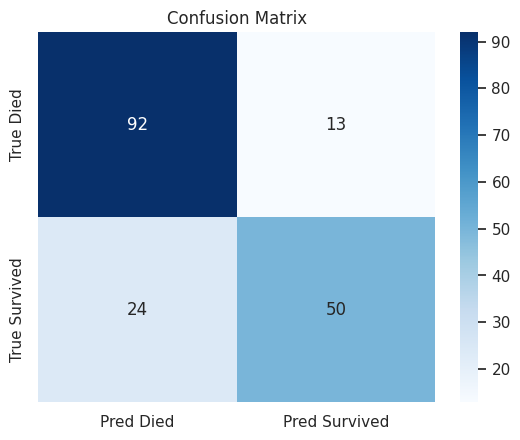

In [ ]:
y_pred = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReport:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred Died", "Pred Survived"],
            yticklabels=["True Died", "True Survived"])
plt.title("Confusion Matrix")
plt.show()


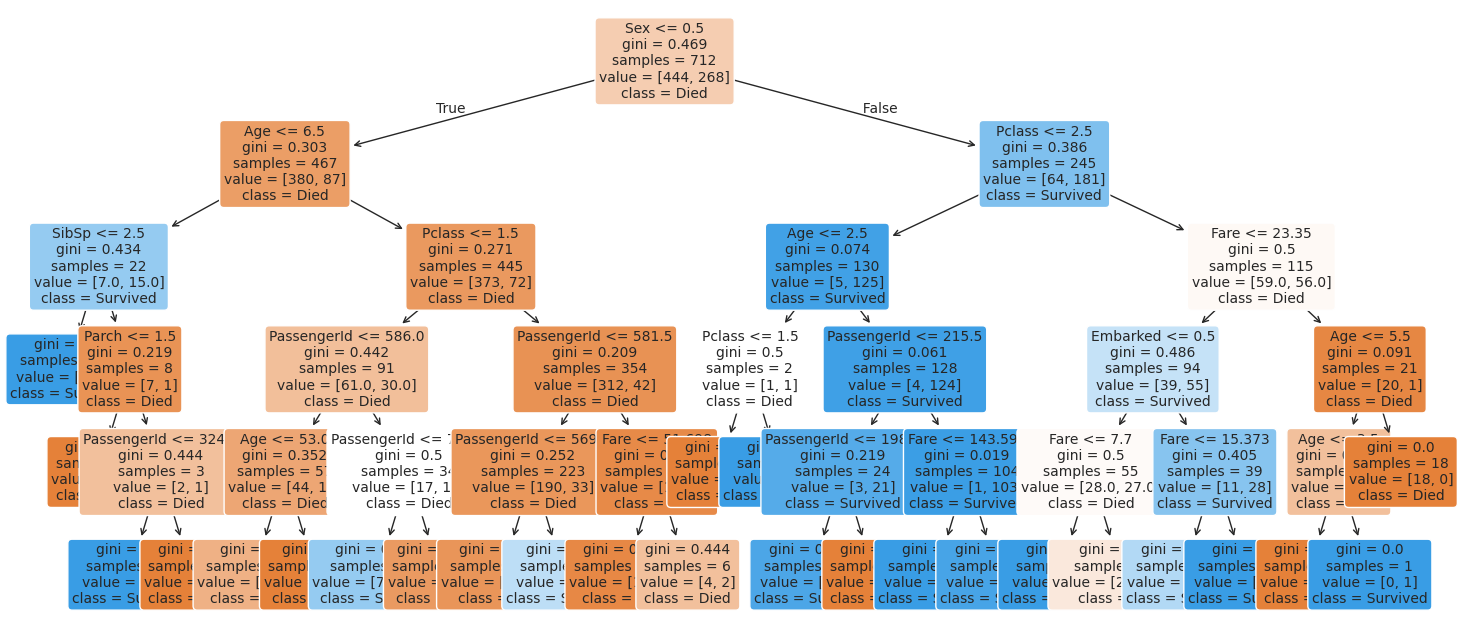

In [ ]:
plt.figure(figsize=(18,8))
plot_tree(dt, feature_names=X.columns, class_names=["Died","Survived"],
          filled=True, rounded=True, fontsize=10)
plt.show()
